In [95]:
#importando as bibliotecas e renomeando-as
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp

In [96]:
#abrindo a tabela completa
df = pd.read_csv('cause_of_deaths.csv')

#verificando a tabela
df

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,3176,2108,381,2990,2373,2751,1956,4202,632,146
6116,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,3259,2160,393,3027,2436,2788,1962,4264,648,146
6117,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,3313,2196,398,2962,2473,2818,2007,4342,654,144
6118,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,3381,2240,400,2890,2509,2849,2030,4377,657,139


In [97]:
#pegando os nomes das colunas
df.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis'],
      dtype='object')

In [98]:
#somando os dados de mortes totais por ano
#separando apenas as doenças
df2 = df[['Year', 'Meningitis',
       "Alzheimer's Disease and Other Dementias", "Parkinson's Disease",
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis']]

#renomeando algumas colunas para não dar erros
df2_renomeado = df2.rename(columns = {"Alzheimer's Disease and Other Dementias": 'A',
                                      "Parkinson's Disease": 'B',
                                      'HIV/AIDS': 'C',
                                      'Self-harm': 'D',
                                      'Protein-Energy Malnutrition': 'E',
                                      'Fire, Heat, and Hot Substances': 'F',
                                      'Nutritional Deficiencies': 'G',
                                      'Interpersonal Violence': 'H',
                                      'Maternal Disorders': 'I',
                                      'Drug Use Disorders': 'J',
                                      'Cardiovascular Diseases': 'K',
                                      'Lower Respiratory Infections': 'L',
                                      'Neonatal Disorders': 'M',
                                      'Alcohol Use Disorders': 'N',
                                      'Exposure to Forces of Nature': 'O',
                                      'Diarrheal Diseases': 'P',
                                      'Environmental Heat and Cold Exposure': 'Q',
                                      'Conflict and Terrorism': 'R',
                                      'Diabetes Mellitus': 'S',
                                      'Chronic Kidney Disease': 'T',
                                      'Road Injuries': 'U',
                                      'Chronic Respiratory Diseases': 'V',
                                      'Cirrhosis and Other Chronic Liver Diseases': 'W',
                                      'Digestive Diseases': 'X',
                                      'Acute Hepatitis': 'Y'
                                      })

#realizando a soma das tuplas e adicionando a coluna 'Total'
df3 = df2_renomeado.eval('Total = Meningitis + A + B + G + Malaria + Drowning + H + I + C + J + Tuberculosis + K + L + M + N + D + O + P + Q + Neoplasms + R + S + T + Poisonings + E + U + V + W + X + F + Y')

df3

,Year,Meningitis,A,B,G,Malaria,Drowning,H,I,C,...,T,Poisonings,E,U,V,W,X,F,Y,Total
0,1990,2159,1116,371,2087,93,1370,1538,2655,34,...,3709,338,2054,4154,5945,2673,5005,323,2985,147971
1,1991,2218,1136,374,2153,189,1391,2001,2885,41,...,3724,351,2119,4472,6050,2728,5120,332,3092,156844
2,1992,2475,1162,378,2441,239,1514,2299,3315,48,...,3776,386,2404,5106,6223,2830,5335,360,3325,169156
3,1993,2812,1187,384,2837,108,1687,2589,3671,56,...,3862,425,2797,5681,6445,2943,5568,396,3601,182230
4,1994,3027,1211,391,3081,211,1809,2849,3863,63,...,3932,451,3038,6001,6664,3027,5739,420,3816,194795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,2015,1439,754,215,3019,2518,770,1302,1355,29162,...,2108,381,2990,2373,2751,1956,4202,632,146,130080
6116,2016,1457,767,219,3056,2050,801,1342,1338,27141,...,2160,393,3027,2436,2788,1962,4264,648,146,128274
6117,2017,1460,781,223,2990,2116,818,1363,1312,24846,...,2196,398,2962,2473,2818,2007,4342,654,144,126515
6118,2018,1450,795,227,2918,2088,825,1396,1294,22106,...,2240,400,2890,2509,2849,2030,4377,657,139,123506


In [99]:
#separando a coluna do ano
df4 = df3[['Year']]

#retirando os valores repetidos e atribuindo a variáel 'year'
year = df4.drop_duplicates()

year

,Year
0,1990
1,1991
2,1992
3,1993
4,1994
5,1995
6,1996
7,1997
8,1998
9,1999


In [100]:
df3

,Year,Meningitis,A,B,G,Malaria,Drowning,H,I,C,...,T,Poisonings,E,U,V,W,X,F,Y,Total
0,1990,2159,1116,371,2087,93,1370,1538,2655,34,...,3709,338,2054,4154,5945,2673,5005,323,2985,147971
1,1991,2218,1136,374,2153,189,1391,2001,2885,41,...,3724,351,2119,4472,6050,2728,5120,332,3092,156844
2,1992,2475,1162,378,2441,239,1514,2299,3315,48,...,3776,386,2404,5106,6223,2830,5335,360,3325,169156
3,1993,2812,1187,384,2837,108,1687,2589,3671,56,...,3862,425,2797,5681,6445,2943,5568,396,3601,182230
4,1994,3027,1211,391,3081,211,1809,2849,3863,63,...,3932,451,3038,6001,6664,3027,5739,420,3816,194795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,2015,1439,754,215,3019,2518,770,1302,1355,29162,...,2108,381,2990,2373,2751,1956,4202,632,146,130080
6116,2016,1457,767,219,3056,2050,801,1342,1338,27141,...,2160,393,3027,2436,2788,1962,4264,648,146,128274
6117,2017,1460,781,223,2990,2116,818,1363,1312,24846,...,2196,398,2962,2473,2818,2007,4342,654,144,126515
6118,2018,1450,795,227,2918,2088,825,1396,1294,22106,...,2240,400,2890,2509,2849,2030,4377,657,139,123506


In [101]:
#separar a colunas de ano e total para somar todos os valores de cada ano
df4 = df3[['Year', 'Total']]

#criação da lista para a nova coluna e do contador de anos
lista_totais_ano = []
i = 1990

#loop para separar cada ano e seus valores
#df4.loc[df4['Year'] == 1990]
#adicionando o total na lista

while i < 2020:
    df5 = df4.loc[df4['Year'] == i]
    lista_totais_ano.append(df5['Total'].sum())
    
    i += 1

#imprimindo a lista dos valores que serão usados para criar a nova coluna
print(lista_totais_ano)

[43518516, 44059729, 44459130, 45185713, 46182613, 46177018, 46320827, 46672370, 47066088, 47652090, 48050317, 48385692, 48897031, 49123952, 49330171, 49591909, 49424521, 49495216, 50115740, 49900666, 50422775, 50413303, 50597654, 50931550, 51268375, 51856393, 52337435, 52789758, 53545244, 54362920]


In [103]:
#transformando a lista 'lista_totais_ano' em uma nova coluna 'Total'
total = pd.DataFrame(lista_totais_ano, columns = ['Total'])

total

,Total
0,43518516
1,44059729
2,44459130
3,45185713
4,46182613
5,46177018
6,46320827
7,46672370
8,47066088
9,47652090


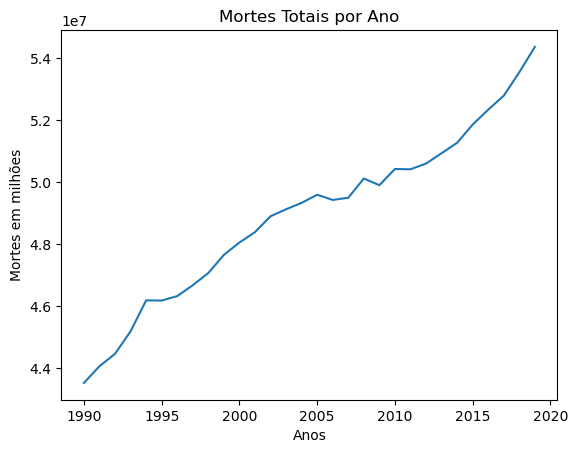

In [109]:
#criando o gráfico para análise através da biblioteca matplotlib
#o gráfico irá analisar o total de mortes por ano
mp.plot(year, total)

#adicionando alguns detalhes
mp.title('Mortes Totais por Ano')
mp.xlabel('Anos')
mp.ylabel('Mortes em milhões')

mp.show()